In [1]:
import numpy as np
import time
from random import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import signal
import sympy as sy
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display
from sympy import oo, Symbol, integrate

In [2]:
# Tricky one this month. Python/sympy wasn't enough and had to learn a bit of sagemath to get the answer
# In order tried the following numerical solutions
#
# 1. Simulation - didn't converge
# 2. Numerical convolution and integration. Slow and didn't trust the answers given numerical errors I was seeing
# 3. Using sympy to do the convolutions but it doesn't handle piecewise functions well and hence is very slow. 
# 4. Pulled in SageMath and computed in that (doesn't allow variables in the domains for piecewise which was a bit of a pain.
#    from a quick look at wolfram cloud that looks to be able to manage that which would make the solution much easier)

# I've added in the published solutions below

url='https://www.janestreet.com/puzzles/robot-tug-of-war-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[7]+"\n"+"\n".join(y[10:22])))

### Robot Tug-of-War
The
Robot Weightlifting World
Championship
was such a huge success that the organizers have hired you to help
design its sequel: a Robot Tug-of-War Competition!
In each one-on-one matchup, two robots are tied together with a
rope. The center of the rope has a marker that begins above position 0
on the ground. The robots then alternate pulling on the rope. The
first robot pulls in the positive direction towards 1; the second
robot pulls in the negative direction towards
-1.
Each pull moves
the marker a uniformly random draw from [0,1] towards the pulling
robot. If the marker first leaves the interval
[‑½,½]
past ½, the
first robot wins. If instead it first leaves the interval past
-½,
the
second robot wins.
However, the organizers quickly noticed that the robot going second is
at a disadvantage. They want to handicap the first robot by changing
the initial position of the marker on the rope to be at some negative
real number. Your job is to compute the position of the marker that
makes each matchup a 50-50 competition between the robots.
Find this
position to seven significant digits

In [3]:
url='https://www.janestreet.com/puzzles/robot-tug-of-war-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
txt =[text for text in soup.body.stripped_strings]

#display([(i,j) for i,j in enumerate(y)])

In [4]:
x,y,C1,C2 = sy.symbols('x y C1 C2')
f=sy.Function('f')

In [5]:
display(Markdown("\n\n"+txt[17]+"\n\n"+"\n".join(txt[18:40])))                                

Eq = sy.Eq(f(x),(1/2+x)+sy.integrate(1-f(-y),(y,x,1/2)))
display(Eq)



The symmetry of the game implies

f
(
x
) = Prob(Player 1 wins in the first move) + ∫
x
½
Prob(Player 2 wins starting at position (-
y
))
dy
= (½ +
x
) + ∫
x
½
(1 -
f
(-
y
))
dy
.

Eq(f(x), x + Integral(1 - f(-y), (y, x, 0.5)) + 0.5)

In [6]:
display(Markdown("\n\n"+txt[40]+"\n\n"+"\n".join(txt[41:53])))   

Eq0 = sy.Eq(sy.diff(Eq.lhs,x),sy.diff(Eq.rhs,x))
Eq0



Differentiating and applying the fundamental theorem of calculus, we get

f’
(
x
) = 1 - (1 -
f
(-
x
)) =
f
(-
x
).

Eq(Derivative(f(x), x), f(-x))

In [7]:
display(Markdown("\n\n"+txt[53]+"\n\n"+"\n".join(txt[54:69])+" )"))    
Eq1 = sy.Eq(sy.diff(f(x),x,2),-f(x))
display(Eq1)



Differentiating again and employing the chain rule, and then substituting the equation above, we get

f’’
(
x
) =
f’
(-
x
)·(-1) = -
f’
(-
x
) = -
f
(
x )

Eq(Derivative(f(x), (x, 2)), -f(x))

In [8]:

Eqs = sy.dsolve(Eq1)
display(Eqs)

Eq(f(x), C1*sin(x) + C2*cos(x))

In [9]:
display(Markdown("\n".join(txt[81:91])))  

cnd0 = sy.Eq(Eqs.rhs.subs(x,1/2),1)
cnd1 = sy.Eq(sy.diff(Eqs.rhs,x).subs(x,0),Eqs.rhs.subs(x,0))
const = sy.solve([cnd0,cnd1])
display(cnd0,cnd1)

).
We need two boundary conditions to determine
f
exactly. First, it’s clear we must have
f
(½) = 1. Second, from the above formula,
f’
(0) =
f
(0)

Eq(0.479425538604203*C1 + 0.877582561890373*C2, 1)

Eq(C1, C2)

In [10]:
soln = sy.solve(sy.Eq(Eqs.rhs.subs({C1:const[C1],C2:const[C2]}),0.5))

soln[0]

-0.285000121786337

In [11]:
display(Markdown("### "+txt[7]+"\n"+txt[10]+txt[11]+txt[12]+"\n\n"+"\n".join(txt[13:17])+
                 "\n\n"+txt[17]+"\n\n"+"\n".join(txt[18:40])+
                 "\n\n"+txt[40]+"\n\n"+"\n".join(txt[41:53])+
                 "\n\n"+txt[53]+"\n\n"+"\n".join(txt[54:69])+
                 "\n\n"+txt[69]+"\n\n"+"\n".join(txt[70:82])+
                 "\n\n"+"\n".join(txt[82:91])+
                 "\n\n"+"\n".join(txt[:104])+
                 "\n\n"+"\n".join(txt[104:121])+
                 "\n\n"+"\n".join(txt[121:127] )))     
    
    

### Robot Tug-of-War
In order to find the starting position of the tug-of-war to make a
fair fight, we define the functionfon [-0.5,0.5] as

f
(
x
) =: Prob(Player 1 wins at a starting position of x).

The symmetry of the game implies

f
(
x
) = Prob(Player 1 wins in the first move) + ∫
x
½
Prob(Player 2 wins starting at position (-
y
))
dy
= (½ +
x
) + ∫
x
½
(1 -
f
(-
y
))
dy
.

Differentiating and applying the fundamental theorem of calculus, we get

f’
(
x
) = 1 - (1 -
f
(-
x
)) =
f
(-
x
).

Differentiating again and employing the chain rule, and then substituting the equation above, we get

f’’
(
x
) =
f’
(-
x
)·(-1) = -
f’
(-
x
) = -
f
(
x

). The general solution to this differential equation is

f
(
x
) =
A
sin(
x
) +
B
cos(
x
).

We need two boundary conditions to determine
f
exactly. First, it’s clear we must have
f
(½) = 1. Second, from the above formula,
f’
(0) =
f
(0)

Intro
Current Puzzle
Archive
Puzzles
Intro
Current Puzzle
Archive
Robot Tug-of-War
August 2021 : Solution
Show Puzzle
In order to find the starting position of the tug-of-war to make a
fair fight, we define the function
f
on [-0.5,0.5] as
f
(
x
) =: Prob(Player 1 wins at a starting position of x).
The symmetry of the game implies
f
(
x
) = Prob(Player 1 wins in the first move) + ∫
x
½
Prob(Player 2 wins starting at position (-
y
))
dy
= (½ +
x
) + ∫
x
½
(1 -
f
(-
y
))
dy
.
Differentiating and applying the fundamental theorem of calculus, we get
f’
(
x
) = 1 - (1 -
f
(-
x
)) =
f
(-
x
).
Differentiating again and employing the chain rule, and then substituting the equation above, we get
f’’
(
x
) =
f’
(-
x
)·(-1) = -
f’
(-
x
) = -
f
(
x
). The general solution to this differential equation is
f
(
x
) =
A
sin(
x
) +
B
cos(
x
).
We need two boundary conditions to determine
f
exactly. First, it’s clear we must have
f
(½) = 1. Second, from the above formula,
f’
(0) =
f
(0)
Therefore,
A
sin(½) +
B
cos(½) = 1, and
A
cos(0) -
B
sin(0) =
A
sin(0) +
B
cos(0).

The second equation implies
A
=
B
, and the first equation then gives
A
=
B
= 1/(sin(½) + cos(½)), so
f
(
x
) = (sin(
x
) + cos(
x
))/(sin(½) + cos(½)).

Therefore the answer is the solution to (sin(
x
) +
cos(
x
))/(sin(½) + cos(½)) = ½ on [-½,0].  A calculator can give this
to the desired accuracy,
-0.2850001…

In [12]:
def game(start):
    x = start
    while True:
        x += random()
        if x > 0.5:
            return 1
            break
        x -= random()
        if x < -0.5:
            return 0
            break
            
def sim(start,iters):
    for i in range(iters):
        n+=1
        x+= game(start)
        return(x/n)

In [18]:
n= 0
x = 0
y = 0
z= 0

for i in range(4000000):
    n+=1
    x+= game(-.285)
    y+= game(-.2850001)
    z+= game(-.2850002)
    if n %20e4 ==0:
        print("After {} sims average={:.7f}/{:.7f}/{:.7f}".format(n,x/n,y/n,z/n))
    

After 200000 sims average=0.4992850/0.4989650/0.5027400
After 400000 sims average=0.5003650/0.4992800/0.5015500
After 600000 sims average=0.5002367/0.5000600/0.5008083
After 800000 sims average=0.5007850/0.5000500/0.5004513
After 1000000 sims average=0.5005790/0.5005240/0.5003470
After 1200000 sims average=0.5002833/0.5004592/0.5005092
After 1400000 sims average=0.5003250/0.5004500/0.5003607
After 1600000 sims average=0.5001800/0.5005525/0.5003119
After 1800000 sims average=0.5004383/0.5007061/0.5000694
After 2000000 sims average=0.5004965/0.5006265/0.4999150
After 2200000 sims average=0.5004636/0.5004791/0.4997709
After 2400000 sims average=0.5004679/0.5004079/0.4998096
After 2600000 sims average=0.5005327/0.5002812/0.4997242
After 2800000 sims average=0.5005643/0.5003268/0.4997200
After 3000000 sims average=0.5004950/0.5002843/0.4997300
After 3200000 sims average=0.5005341/0.5001756/0.4998472
After 3400000 sims average=0.5005768/0.5001050/0.4998926
After 3600000 sims average=0.500514

A wins 0.21550


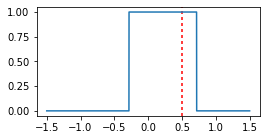

0.7845000000000002
B wins 0.30772


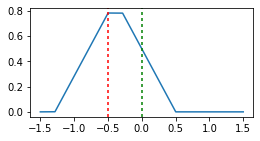

0.4767810517479997
A wins 0.16500


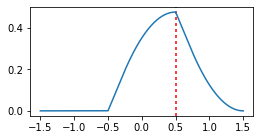

0.31178093371925986
B wins 0.11497


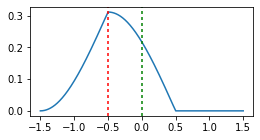

0.1968136942476139
A wins 0.07113


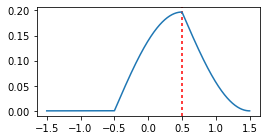

0.12567918017897403
B wins 0.04575


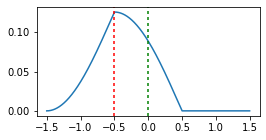

0.07992971985333307
A wins 0.02903


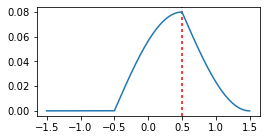

0.050902015970529055
B wins 0.01850


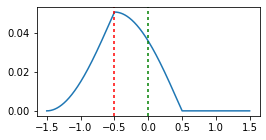

0.03240168376561803
A wins 0.01177


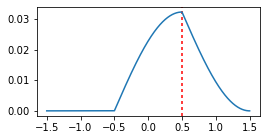

0.020628257869814037
B wins 0.00750


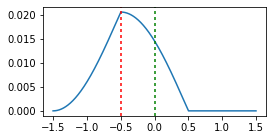

0.013132239888093927
A wins 0.00477


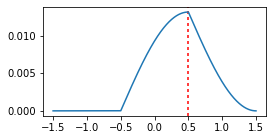

0.49720685438642664


In [14]:
plt.rcParams["figure.figsize"] = (4,2)

a_dist = stats.uniform(loc=0, scale=1)
b_dist = stats.uniform(loc=-1, scale=1)
delta = 1e-6
big_grid = np.arange(-1.5,1.5,delta)

pmf_a = a_dist.pdf(big_grid)*delta
pmf_b = b_dist.pdf(big_grid)*delta

a_win = 0

running = stats.uniform(loc=-0.2845, scale=1).pdf(big_grid)*delta 

a_win += np.trapz(running[big_grid>0.5]/delta, big_grid[big_grid>0.5])
print("A wins {:.5f}".format(np.trapz(running[big_grid>0.5]/delta, big_grid[big_grid>0.5])))

plt.axvline(0.5,dashes=(2,2),c='r')
plt.plot(big_grid, running/delta)
plt.show()
running[big_grid>0.5] =0

for i in range(5):
    running = signal.fftconvolve(running,pmf_b,"same")
    print(max(running/delta))
    print("B wins {:.5f}".format(np.trapz(running[big_grid<-0.5]/delta, big_grid[big_grid<-0.5])))
    plt.plot(big_grid, running/delta)
    plt.axvline(-0.5,dashes=(2,2),c='r')
    plt.axvline(-0,dashes=(2,2),c='g')
    plt.show()
    running[big_grid<-0.5] =0
    
    running = signal.fftconvolve(running,pmf_a,'same')
    print(max(running/delta))
    print("A wins {:.5f}".format(np.trapz(running[big_grid>0.5]/delta, big_grid[big_grid>0.5])))
    plt.axvline(0.5,dashes=(2,2),c='r')
    plt.plot(big_grid, running/delta)
    plt.show()
    a_win += np.trapz(running[big_grid>0.5]/delta, big_grid[big_grid>0.5])
    running[big_grid>0.5] =0
    
print(a_win)    

In [15]:
def convolve(f, g, t, lower=-oo, upper=oo):
    tau = Symbol('tau', real=True)
    return sy.diff(sy.integrate(sy.piecewise_fold(sy.integrate(f.subs(t, tau) * g.subs(t, t - tau),(tau,-oo,oo)).rewrite('Piecewise'))))

x  =Symbol('x',real=True)
a = sy.Piecewise((0, x < 0), (1, x < 1), (0, True))
b = sy.Piecewise((0, x < -1), (1, x < 0), (0, True))

a_filter = lambda z:sy.diff(sy.integrate(sy.piecewise_fold(z*sy.Piecewise((0,x > 1/2),(1,True)))))
b_filter = lambda z:sy.diff(sy.integrate(sy.piecewise_fold(z*sy.Piecewise((0,x < -1/2),(1,True)))))

In [16]:
p = sy.Piecewise((0, x < 0), (1, x < 1), (0, True))
display("Starting Dist",p)
res = sy.integrate(p).subs(x,3/2)-sy.integrate(p).subs(x,1/2)
print("A chance",res )

for i in range(2):
    p=a_filter(p)
    display("After A cut",p)
    p = convolve(p,b,x)
    display("After B move",p)
    display("integral",sy.integrate(p))
    res = integrate(p).subs(x,-1/2)
    print("B chance",res)

    p=b_filter(p)
    display("After B cut",p)
    p = convolve(p,a,x)
    display("After A move",p)
    display("integral",sy.integrate(p))
    res = sy.integrate(p).subs(x,3/2)-sy.integrate(p).subs(x,1/2)
    print("A chance",res )

'Starting Dist'

Piecewise((0, x < 0), (1, x < 1), (0, True))

A chance 0.500000000000000


'After A cut'

Piecewise((0, x < 0), (1, x <= 0.5), (0, True))

'After B move'

Piecewise((0, x <= -1), (x + 1, x <= -0.5), (0.5, x <= 0), (0.5 - 1.0*x, x <= 0.5), (0, True))

'integral'

Piecewise((0, x <= -1), (x**2/2 + x + 1/2, x <= -0.5), (0.5*x + 0.375, x <= 0), (-0.5*x**2 + 0.5*x + 0.375, x <= 0.5), (0.5, True))

B chance 0.125000000000000


'After B cut'

Piecewise((0, x < -0.5), (0.5, x <= 0), (0.5 - 1.0*x, x <= 0.5), (0, True))

'After A move'

Piecewise((0, x <= -0.5), (0.5*x + 0.25, x <= 0), (-0.5*x**2 + 0.5*x + 0.25, x <= 0.5), (0.625 - 0.5*x, x <= 1), (0.5*x**2 - 1.5*x + 1.125, x <= 1.5), (0, True))

'integral'

Piecewise((0, x <= -0.5), (0.25*x**2 + 0.25*x + 0.0625, x <= 0), (-0.166666666666667*x**3 + 0.25*x**2 + 0.25*x + 0.0625, x <= 0.5), (-0.25*x**2 + 0.625*x - 0.0208333333333333, x <= 1), (0.166666666666667*x**3 - 0.75*x**2 + 1.125*x - 0.1875, x <= 1.5), (0.375, True))

A chance 0.145833333333333


'After A cut'

Piecewise((0, x <= -0.5), (0.5*x + 0.25, x <= 0), (-0.5*x**2 + 0.5*x + 0.25, x <= 0.5), (0, True))

'After B move'

Piecewise((1.73472347597681e-17, x <= -1.5), (0.25*x**2 + 0.75*x + 0.5625, x <= -1), (-0.166666666666667*x**3 - 0.25*x**2 + 0.25*x + 0.395833333333333, x <= -0.5), (-0.25*x**2 - 0.25*x + 0.166666666666667, x <= 0), (0.166666666666667*x**3 - 0.25*x**2 - 0.25*x + 0.166666666666667, x <= 0.5), (0, True))

'integral'

Piecewise((1.73472347597681e-17*x, x <= -1.5), (0.0833333333333333*x**3 + 0.375*x**2 + 0.5625*x + 0.28125, x <= -1), (-0.0416666666666667*x**4 - 0.0833333333333333*x**3 + 0.125*x**2 + 0.395833333333333*x + 0.239583333333333, x <= -0.5), (-0.0833333333333333*x**3 - 0.125*x**2 + 0.166666666666667*x + 0.184895833333333, x <= 0), (0.0416666666666667*x**4 - 0.0833333333333333*x**3 - 0.125*x**2 + 0.166666666666667*x + 0.184895833333333, x <= 0.5), (0.229166666666667, True))

B chance 0.0807291666666667


'After B cut'

Piecewise((0, x < -0.5), (-0.25*x**2 - 0.25*x + 0.166666666666667, x <= 0), (0.166666666666667*x**3 - 0.25*x**2 - 0.25*x + 0.166666666666667, x <= 0.5), (0, True))

'After A move'

Piecewise((0, x <= -0.5), (-0.0833333333333333*x**3 - 0.125*x**2 + 0.166666666666667*x + 0.104166666666667, x <= 0), (0.0416666666666667*x**4 - 0.0833333333333333*x**3 - 0.125*x**2 + 0.166666666666667*x + 0.104166666666667, x <= 0.5), (0.0833333333333333*x**3 - 0.125*x**2 - 0.166666666666667*x + 0.252604166666667, x <= 1), (-0.0416666666666667*x**4 + 0.25*x**3 - 0.375*x**2 + 2.77555756156289e-17*x + 0.2109375, x <= 1.5), (0, True))

'integral'

Piecewise((0, x <= -0.5), (-0.0208333333333333*x**4 - 0.0416666666666667*x**3 + 0.0833333333333333*x**2 + 0.104166666666667*x + 0.02734375, x <= 0), (0.00833333333333333*x**5 - 0.0208333333333333*x**4 - 0.0416666666666667*x**3 + 0.0833333333333333*x**2 + 0.104166666666667*x + 0.02734375, x <= 0.5), (0.0208333333333333*x**4 - 0.0416666666666667*x**3 - 0.0833333333333333*x**2 + 0.252604166666667*x - 0.00755208333333336, x <= 1), (-0.00833333333333333*x**5 + 0.0625*x**4 - 0.125*x**3 + 1.38777878078145e-17*x**2 + 0.2109375*x + 0.000781249999999956, x <= 1.5), (0.1484375, True))

A chance 0.0544270833333334
